## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import math
from math import radians, sin, cos, sqrt, atan2

##### Import Data & Merge into one datasoure

Data Source:
https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/explore and https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

In [2]:
crime_data1 = pd.read_csv('../data/raw/Crime_Data_from_2010_to_2019.csv')
crime_data2 = pd.read_csv('../data/raw/Crime_Data_from_2020_to_Present.csv')
print(crime_data1.info())
print(crime_data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135573 entries, 0 to 2135572
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

Both dataframes context are identical, so it will be merge into one data frame

In [3]:
# Make all columns to upper case and remove space
crime_data1.columns = crime_data1.columns.str.upper().str.strip()
crime_data2.columns = crime_data2.columns.str.upper().str.strip()

# Concatenate them vertically (along rows)
crime_data = pd.concat([crime_data1, crime_data2], ignore_index=True)

In [4]:
crime_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924340 entries, 0 to 2924339
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   DATE RPTD       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   RPT DIST NO     int64  
 7   PART 1-2        int64  
 8   CRM CD          int64  
 9   CRM CD DESC     object 
 10  MOCODES         object 
 11  VICT AGE        int64  
 12  VICT SEX        object 
 13  VICT DESCENT    object 
 14  PREMIS CD       float64
 15  PREMIS DESC     object 
 16  WEAPON USED CD  float64
 17  WEAPON DESC     object 
 18  STATUS          object 
 19  STATUS DESC     object 
 20  CRM CD 1        float64
 21  CRM CD 2        float64
 22  CRM CD 3        float64
 23  CRM CD 4        float64
 24  LOCATION        object 
 25  CROSS STREET    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [5]:
crime_data.reset_index()

,index,DR_NO,DATE RPTD,DATE OCC,TIME OCC,AREA,AREA NAME,RPT DIST NO,PART 1-2,CRM CD,...,STATUS,STATUS DESC,CRM CD 1,CRM CD 2,CRM CD 3,CRM CD 4,LOCATION,CROSS STREET,LAT,LON
0,0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924335,2924335,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
2924336,2924336,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
2924337,2924337,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
2924338,2924338,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


## Explore Data

Number Of Missing Values By Column

In [6]:
missing_crime= pd.concat([crime_data.isnull().sum(), 100 * crime_data.isnull().mean()], axis=1)
missing_crime.columns=['count', '%']
missing_crime.sort_values(by=['count'])

,count,%
DR_NO,0,0.000000
LOCATION,0,0.000000
STATUS DESC,0,0.000000
LAT,0,0.000000
VICT AGE,0,0.000000
CRM CD DESC,0,0.000000
CRM CD,0,0.000000
LON,0,0.000000
RPT DIST NO,0,0.000000
AREA NAME,0,0.000000


Handling Missing data

In [7]:
# Fill missing values
crime_data['MOCODES'].fillna('', inplace=True)
crime_data['VICT SEX'].fillna('Unknown', inplace=True)
crime_data['VICT DESCENT'].fillna('Unknown', inplace=True)
crime_data['PREMIS DESC'].fillna('Unknown', inplace=True)
crime_data['WEAPON DESC'].fillna('None', inplace=True)
crime_data['CRM CD 1'].fillna(-1, inplace=True)


# Extract month, day, and year from crime data

crime_data['DATE RPTD'] = pd.to_datetime(crime_data['DATE RPTD'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

crime_data['MTH_RPTD'] = crime_data['DATE RPTD'].dt.month
crime_data['DAY_RPTD'] = crime_data['DATE RPTD'].dt.day
crime_data['YEAR_RPTD'] = crime_data['DATE RPTD'].dt.year

crime_data['MTH_OCC'] = crime_data['DATE OCC'].dt.month
crime_data['DAY_OCC'] = crime_data['DATE OCC'].dt.day
crime_data['YEAR_OCC'] = crime_data['DATE OCC'].dt.year


##### For crime data, need only location , type of crime & crime date rough timing . the rest of the columns shall be dropped.

In [9]:
columns_to_drop_crime= ['DR_NO', 'CROSS STREET','CRM CD 2', 'CRM CD 3', 'CRM CD 4']
crime_data.drop(columns=columns_to_drop_crime, inplace=True)

##### Check if there is any duplicate records after removing raw data unique IDs

In [10]:
#Remove dupliate and keep as new cleaned dataframes
crime_data= crime_data.drop_duplicates(keep='last')

In [11]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2865898 entries, 0 to 2924339
Data columns (total 29 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DATE RPTD       datetime64[ns]
 1   DATE OCC        datetime64[ns]
 2   TIME OCC        int64         
 3   AREA            int64         
 4   AREA NAME       object        
 5   RPT DIST NO     int64         
 6   PART 1-2        int64         
 7   CRM CD          int64         
 8   CRM CD DESC     object        
 9   MOCODES         object        
 10  VICT AGE        int64         
 11  VICT SEX        object        
 12  VICT DESCENT    object        
 13  PREMIS CD       float64       
 14  PREMIS DESC     object        
 15  WEAPON USED CD  float64       
 16  WEAPON DESC     object        
 17  STATUS          object        
 18  STATUS DESC     object        
 19  CRM CD 1        float64       
 20  LOCATION        object        
 21  LAT             float64       
 22  LON             fl

## Categorial Features

In [12]:
crime_data.select_dtypes('object')

,AREA NAME,CRM CD DESC,MOCODES,VICT SEX,VICT DESCENT,PREMIS DESC,WEAPON DESC,STATUS,STATUS DESC,LOCATION
0,Newton,VIOLATION OF COURT ORDER,0913 1814 2000,M,H,SINGLE FAMILY DWELLING,None,AA,Adult Arrest,300 E GAGE AV
1,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,M,W,STREET,None,IC,Invest Cont,SEPULVEDA BL
2,Newton,OTHER MISCELLANEOUS CRIME,0344,M,H,ALLEY,None,IC,Invest Cont,1300 E 21ST ST
3,Hollywood,VIOLATION OF COURT ORDER,1100 0400 1402,F,W,STREET,HAND GUN,IC,Invest Cont,CAHUENGA BL
4,Central,"RAPE, ATTEMPTED",0400,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,8TH ST
...,...,...,...,...,...,...,...,...,...,...
2924335,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,M,H,"VEHICLE, PASSENGER/TRUCK",None,IC,Invest Cont,12500 BRANFORD ST
2924336,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,12800 FILMORE ST
2924337,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,6100 S VERMONT AV
2924338,Central,PICKPOCKET,1822 0344,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),None,IC,Invest Cont,500 S MAIN ST


In [13]:
#Lets emphasize on Location ( Area and City) from both datasets
crime_data['AREA NAME'].value_counts()

77th Street    194790
Southwest      179068
Pacific        157989
N Hollywood    152643
Central        150896
Southeast      148336
Hollywood      140524
Newton         139027
Northeast      133937
Van Nuys       132783
Devonshire     127860
Olympic        126272
Rampart        125856
Wilshire       125638
Mission        125019
West LA        124915
Harbor         124164
West Valley    122280
Topanga        120860
Hollenbeck     107251
Foothill       105790
Name: AREA NAME, dtype: int64

## Review distribution

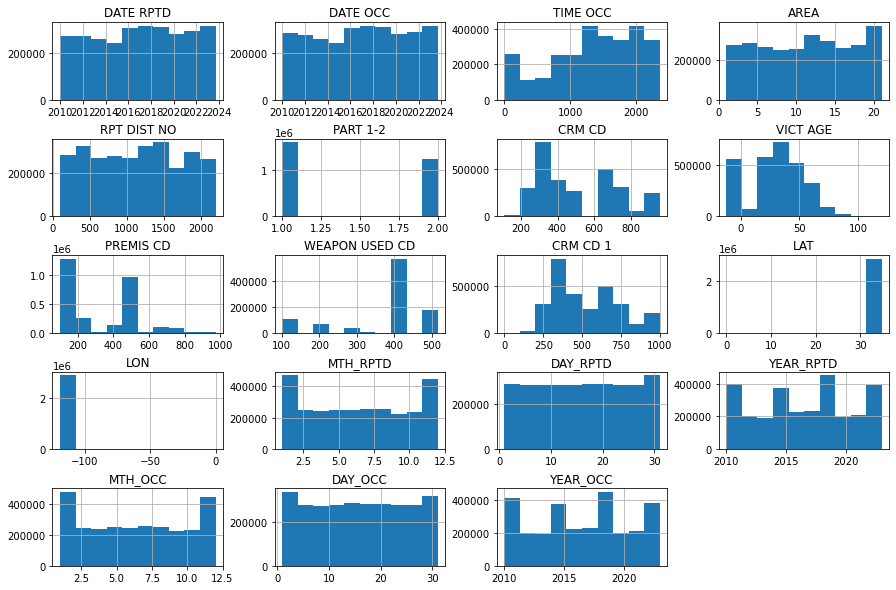

In [14]:
crime_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## Distribution Features

#### Distribution Of Cimes By Area

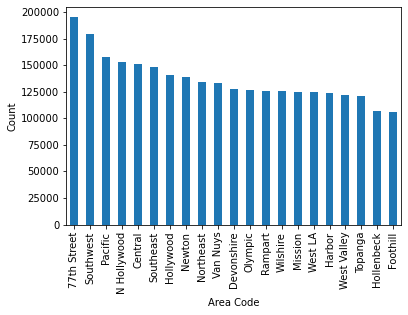

In [15]:
crime_data['AREA NAME'].value_counts().plot(kind='bar')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

#### Distribution Of Crimes by Crime Description

In [16]:
crime_data['CRM CD DESC'].value_counts()

BATTERY - SIMPLE ASSAULT                                   249697
VEHICLE - STOLEN                                           240082
BURGLARY FROM VEHICLE                                      208545
BURGLARY                                                   192831
THEFT PLAIN - PETTY ($950 & UNDER)                         187623
                                                            ...  
TILL TAP - ATTEMPT                                              4
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              4
TRAIN WRECKING                                                  2
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)         1
DRUNK ROLL - ATTEMPT                                            1
Name: CRM CD DESC, Length: 143, dtype: int64

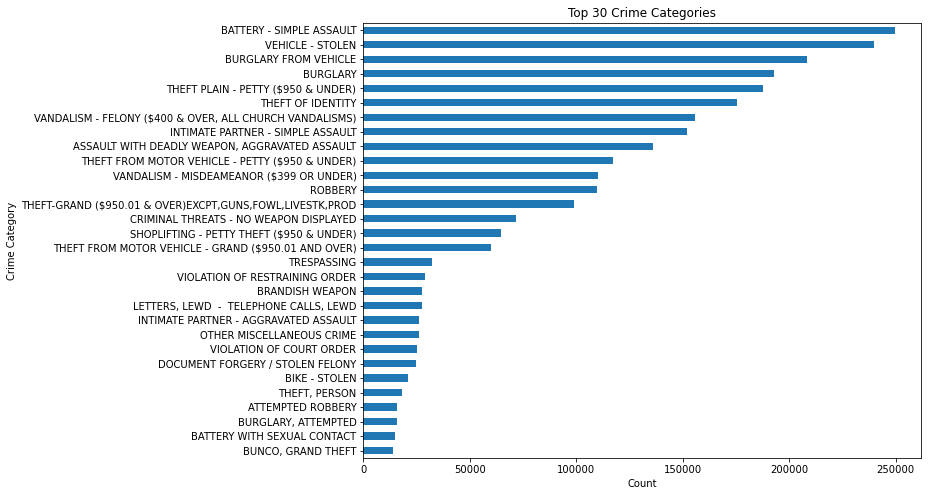

In [17]:
# Get the top 30 crime categories by value counts
top_30_crimes = crime_data['CRM CD DESC'].value_counts().head(30)

# Create the bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
top_30_crimes.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.title('Top 30 Crime Categories')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent crimes at the top
plt.show()

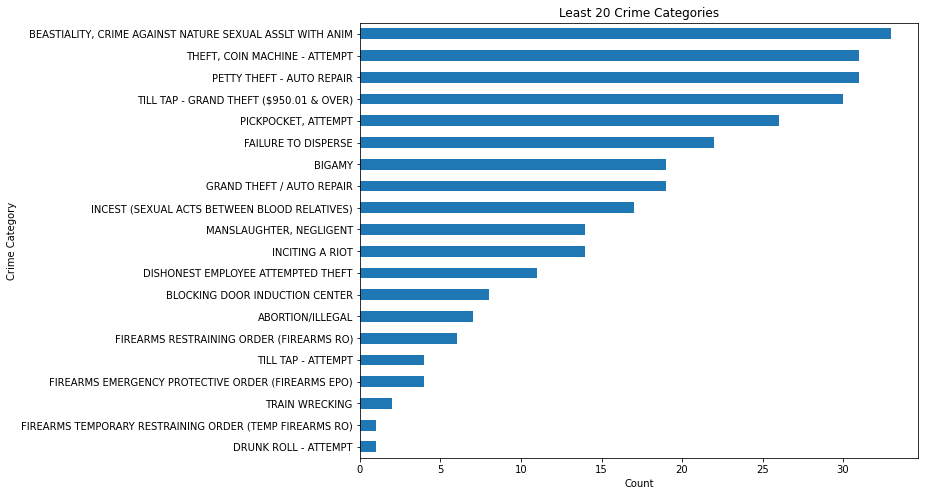

In [19]:
# Get the least crime categories by value counts
least_20_crimes = crime_data['CRM CD DESC'].value_counts().tail(20)

# Create the bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
least_20_crimes.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.title('Least 20 Crime Categories')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent crimes at the top
plt.show()

#### Crime occurance frequency by Area & Type (2010 to Sep 2023)

In [39]:
#Code task 14#
# Calculate  count of crime type by area sort by the average of the two

crime_area_type_count = crime_data.groupby(['AREA NAME', 'CRM CD DESC']).size().reset_index(name='CRIME_COUNT')
sorted_crime_area_type_count = crime_area_type_count.sort_values(by='CRIME_COUNT', ascending=False)
print(crime_area_type_count.head(5))
print(crime_area_type_count.describe().T)

     AREA NAME                                     CRM CD DESC  CRIME_COUNT
0  77th Street                                           ARSON          526
1  77th Street    ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER          190
2  77th Street  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        16701
3  77th Street                               ATTEMPTED ROBBERY         1725
4  77th Street                        BATTERY - SIMPLE ASSAULT        18829
              count         mean          std  min   25%   50%    75%      max
CRIME_COUNT  2687.0  1066.579084  2595.519266  1.0  12.5  85.0  478.5  20493.0


#### Data Distrubution based on occurance date

2023 is not ended yet, so data on 2023 figure is not reliable. However, 2022 is the highest crime rate.

   YEAR_OCC  CRIME_COUNT
0      2010       208695
1      2011       200300
2      2012       201297
3      2013       192367
4      2014       157470
             count      mean           std       min        25%       50%  \
YEAR_OCC      14.0    2016.5      4.183300    2010.0    2013.25    2016.5   
CRIME_COUNT   14.0  204707.0  26010.283765  145765.0  199115.75  208744.5   

                   75%       max  
YEAR_OCC       2019.75    2023.0  
CRIME_COUNT  223562.75  233425.0  


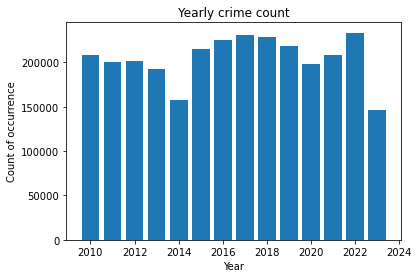

In [54]:
crime_count_by_occ = crime_data.groupby(['YEAR_OCC']).size().reset_index(name='CRIME_COUNT')
print(crime_count_by_occ.head(5))
print(crime_count_by_occ.describe().T)


# Create a bar plot
plt.bar(crime_count_by_occ['YEAR_OCC'], crime_count_by_occ['CRIME_COUNT'])
plt.xlabel('Year')
plt.ylabel('Count of occurrence')
plt.title('Yearly crime count')
#plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()


##### What day of the week is the highest crime occurance ?

In [ ]:
Friday is the highest occurance of crimes.However,the rest of the days are relatively similar in volumns. There is the significant difference.

In [ ]:
crime_data.loc[:, 'WEEKDAY_OCC'] = crime_data['DATE OCC'].dt.strftime('%A')


crime_count_by_weekday = crime_data.groupby(['WEEKDAY_OCC']).size().reset_index(name='CRIME_COUNT')
print(crime_count_by_weekday.head(7))
print(crime_count_by_weekday.describe().T)


# Create a bar plot
plt.bar(crime_count_by_weekday['WEEKDAY_OCC'], crime_count_by_weekday['CRIME_COUNT'])
plt.xlabel('Day of the Week')
plt.ylabel('Count of occurrence')
plt.title('What day of the week is the highest crime occurance ?')
#plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()


## Save data for stastical data exploration( EDA)

In [59]:
crime_data.shape

(2865898, 30)

In [60]:
# Specify the file path where you want to save the CSV file
file_path = "../data/interim/" + "crime_data.csv"

# Save the DataFrame to a CSV file
crime_data.to_csv(file_path, index=False)  # Set index=False to exclude the DataFrame index in the CSV file